<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


/home/deekshant_khitoliya/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [51]:
data.head()

,Gene,ID
0,AKT1,2
1,ALK,8
2,BRAF,1
3,BRCA1,7
4,CBL,1


In [2]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
#https://github.com/jupyter/help/issues/229
#unzipping file in ipython
from shutil import unpack_archive
unpack_archive('training_text.zip', '/home/deekshant_khitoliya/Untitled Folder/Cancer')

In [4]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [5]:
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        data_text[column][index] = total_text

In [6]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 25.04657 seconds


In [7]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate a varie...
1,1,CBL,W802*,2,abstract background non small cell lung cance...
2,2,CBL,Q249E,2,abstract background non small cell lung cance...
3,3,CBL,N454D,3,recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,oncogenic mutations in the monomeric casitas b...


In [8]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [9]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [10]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


##### If anyText feature has NAN values, replace it with 'Gene Variation' and treat it as Text

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [11]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [12]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


In [52]:
X_train.head(4)

,ID,Gene,Variation,Class,TEXT
3111,3111,RAD21,Truncating_Mutations,1,asxl1 is frequently mutated in a spectrum of m...
1411,1411,FGFR3,D646Y,5,frequent genetic alterations discovered in fgf...
737,737,ERBB2,Y835F,1,functional characterization of cancer associat...
255,255,EGFR,E884K,7,a 70 year old japanese american woman who had ...


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [14]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4713848418879687
Log loss on Test Data using Random Model 2.5422932976058004
-------------------- Confusion matrix --------------------


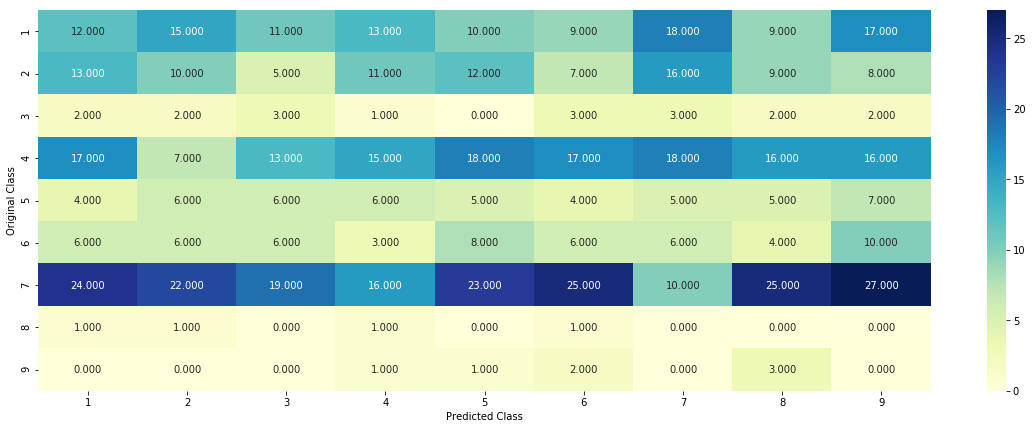

-------------------- Precision matrix (Columm Sum=1) --------------------


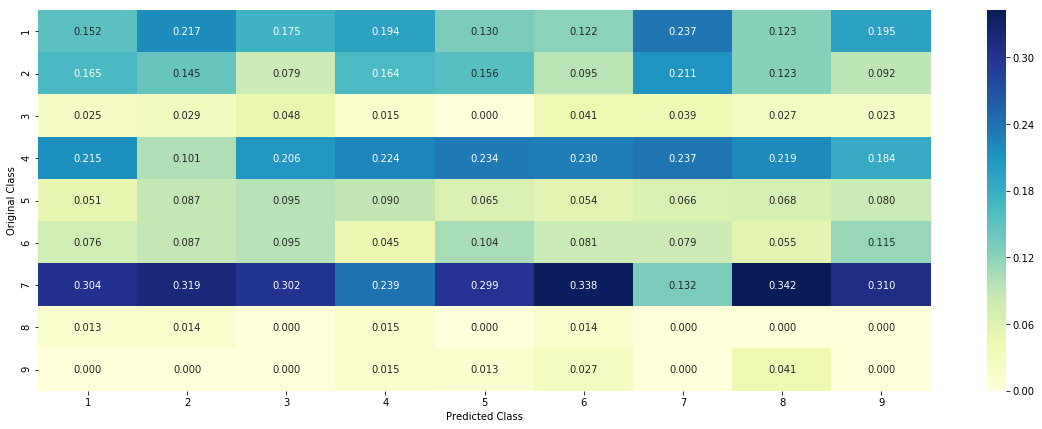

-------------------- Recall matrix (Row sum=1) --------------------


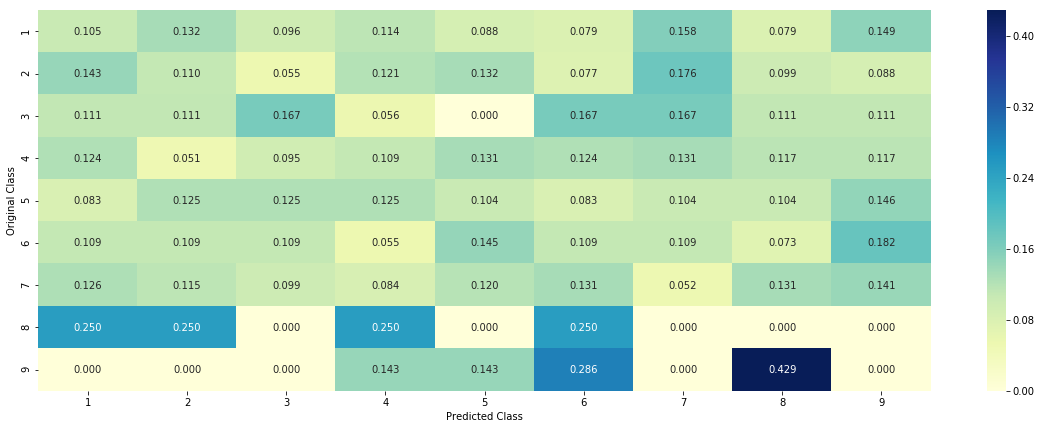

In [15]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

## 4 Make Data Model Ready: encoding numerical, categorical features

### 4.1 Vectorizing Categorical features

#### 4.1.1 GENE

<p style="font-size:18px;"> <b>Q.</b>  featurize Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [127]:
# one-hot encoding of Gene feature.
gene_vectorizer =CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])

gene_features = gene_vectorizer.get_feature_names()
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])


In [128]:
train_df['Gene'].head()

208      EGFR
3281      RET
2830    BRCA2
2163     PTEN
395      TP53
Name: Gene, dtype: object

In [129]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 232)


#### 4.1.2 Variation


<p style="font-size:18px;"> <b>Q.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [130]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
variation_features = variation_vectorizer.get_feature_names()

test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])



In [131]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1960)


### 4.2 Generating Text based features

In [21]:
#Extractinf Text AND id column
training_df= train_df[['ID','TEXT']]
testing_df= test_df[['ID','TEXT']]
cv_data_df= cv_df[['ID','TEXT']]

In [22]:
training_df.head(3)

,ID,TEXT
208,208,purpose clinical features of epidermal growth ...
3281,3281,germ line missense mutations in the ret rearra...
2830,2830,mutation screening of the breast and ovarian c...


In [23]:
#The punctuations have been removed from the string. Lets write a similar function for removing stopwords.

#NLTK stopwords is not quite enough, so we had to update it. 
#I suggest to use 'sklearn.feature_extraction.stop_words' or 'spacy.en.language_data' as these have data twice of stopwords.
from sklearn.feature_extraction import text 
stop_words = set(text.ENGLISH_STOP_WORDS)


def remove_stopwords_from_string(total_text):
    
    
    string = ""
    for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
    return string
     

In [24]:
#Lets take backup of un-processed text, we might need it for future functions.
#We will perform all actions on testing_df aswell to avoid any errors in future.
training_df["text_backup"] = training_df["TEXT"] #Creating new column text_backup same as text.
testing_df["text_backup"] = testing_df["TEXT"] #Creating new column text_backup same as text.
cv_data_df["text_backup"] = cv_data_df['TEXT']

In [25]:
##Applying above made functions on text.
training_df["text"] = training_df["TEXT"].apply(lambda x:remove_stopwords_from_string(x))
testing_df["text"] = testing_df["TEXT"].apply(lambda x:remove_stopwords_from_string(x))
cv_data_df["text"] = cv_data_df["TEXT"].apply(lambda x:remove_stopwords_from_string(x))

training_df.drop('TEXT', axis=1, inplace=True)
testing_df.drop('TEXT', axis=1, inplace=True)
cv_data_df.drop('TEXT', axis=1, inplace=True)
training_df.head(5)

,ID,text_backup,text
208,208,purpose clinical features of epidermal growth ...,purpose clinical features epidermal growth fac...
3281,3281,germ line missense mutations in the ret rearra...,germ line missense mutations ret rearranged tr...
2830,2830,mutation screening of the breast and ovarian c...,mutation screening breast ovarian cancer predi...
2163,2163,the pten phosphatase and tensin homolog phosph...,pten phosphatase tensin homolog phosphatase un...
395,395,tp53 is the most commonly mutated gene in head...,tp53 commonly mutated gene head neck cancer hn...


### Lemmatization

Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [26]:
from textblob import Word
training_df["text"] = training_df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
training_df["text"].head(3)

208     purpose clinical feature epidermal growth fact...
3281    germ line missense mutation ret rearranged tra...
2830    mutation screening breast ovarian cancer predi...
Name: text, dtype: object

In [27]:
testing_df["text"] = testing_df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cv_data_df["text"] = cv_data_df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#### 4.2.1 Feature 1-> Word Count in the Complete text - total number of words in the complete  text

In [28]:
##No Length of the input OR count of the words in the statement(Vocab size).
training_df['word_count']= training_df["text_backup"].apply(lambda x: len(str(x).split()))
testing_df['word_count']= testing_df["text_backup"].apply(lambda x: len(str(x).split()))
cv_data_df['word_count']= cv_data_df["text_backup"].apply(lambda x: len(str(x).split()))

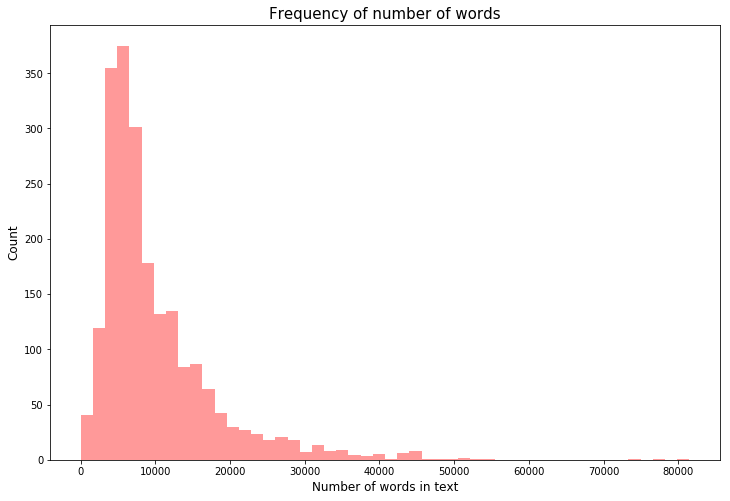

In [134]:
plt.figure(figsize=(12, 8))
sns.distplot(training_df.word_count.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

##### The peak is around 4000 words. Now let us look at character level.

#### 4.2.2 Feature 2-> Character Count in the Complete text - total number of characters in complete  text

In [29]:
#Feature 2 - Count of characters in a statement
training_df['char_count'] = training_df["text_backup"].apply(lambda x: len(str(x)))
testing_df['char_count'] = testing_df["text_backup"].apply(lambda x: len(str(x)))
cv_data_df['char_count'] = cv_data_df["text_backup"].apply(lambda x: len(str(x)))


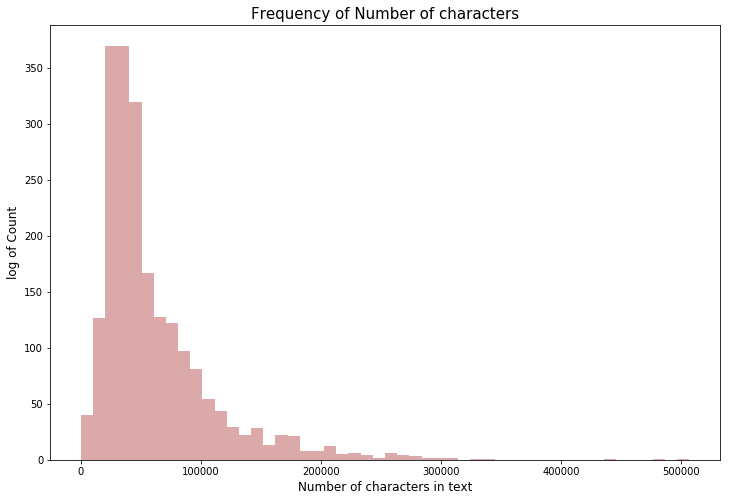

In [135]:
plt.figure(figsize=(12, 8))
sns.distplot(training_df.char_count.values, bins=50, kde=False, color='brown')
plt.xlabel('Number of characters in text', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.title("Frequency of Number of characters", fontsize=15)
plt.show()

The distribution is similar to the previous one.

#### 4.2.3 Feature 3-> Word Density of the Complete text - average length of the words used in the text

In [30]:
#Feature 3-Diversity_score i.e. Average length of words used in statement
training_df['Diversity_score'] = training_df['char_count'] / training_df['word_count']
#X_test = X_test.fillna(X_train.mean())
training_df['Diversity_score']= training_df['Diversity_score'].fillna(training_df['Diversity_score'].mean())


testing_df['Diversity_score'] = testing_df['char_count'] / testing_df['word_count']
testing_df['Diversity_score']= testing_df['Diversity_score'].fillna(testing_df['Diversity_score'].mean())

cv_data_df['Diversity_score'] = cv_data_df['char_count'] / cv_data_df['word_count']
cv_data_df['Diversity_score']= cv_data_df['Diversity_score'].fillna(cv_data_df['Diversity_score'].mean())

training_df.head(5)

,ID,text_backup,text,word_count,char_count,Diversity_score
208,208,purpose clinical features of epidermal growth ...,purpose clinical feature epidermal growth fact...,4774,28353,5.939045
3281,3281,germ line missense mutations in the ret rearra...,germ line missense mutation ret rearranged tra...,9340,57319,6.136938
2830,2830,mutation screening of the breast and ovarian c...,mutation screening breast ovarian cancer predi...,9032,48245,5.341563
2163,2163,the pten phosphatase and tensin homolog phosph...,pten phosphatase tensin homolog phosphatase un...,17784,108995,6.128824
395,395,tp53 is the most commonly mutated gene in head...,tp53 commonly mutated gene head neck cancer hn...,7610,45018,5.915637


#### 4.2.4 Feature 4->Stopword Count in the Complete text - total number of stopwords in the text

In [31]:
#The usage of stop words can be another writing pattern. So the fourth feature is count of stopwords.
#Feature_4 = Count of stopwords in the sentence.
stop_words = set(stopwords.words('english'))
training_df['stopword_count'] = training_df["text_backup"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]) )
testing_df['stopword_count'] = testing_df["text_backup"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]) )
cv_data_df['stopword_count'] = cv_data_df["text_backup"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]) )

#### 4.2.5 Feature 5->Let us identify the highest used words(other than stopwords) in our input data for further feature generation.

In [32]:
#vec = CountVectorizer().fit(corpus)
#Here we get a Bag of Word model that has cleaned the text, removing non-aphanumeric characters and stop words.
#bag_of_words = vec.transform(corpus)
#bag_of_words a matrix where each row represents a specific text in corpus and each column represents a word in vocabulary, that is, all words found in corpus. Note that bag_of_words[i,j] is the occurrence of word j in the text i.
#sum_words = bag_of_words.sum(axis=0)
#sum_words is a vector that contains the sum of each word occurrence in all texts in the corpus. In other words, we are adding the elements for each column of bag_of_words matrix.
#words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#Finally we sort a list of tuples that contain the word and their occurrence in the corpus.





def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
     
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [33]:
#Now I want to get the top 50 common words:
top_50=[]
common_words = get_top_n_words(training_df["text"], 50)
for word, freq in common_words:
    top_50.append(word)

In [34]:
#Feature-5: The count of top used words.
training_df['Top_50_words'] = training_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in top_50]) )
testing_df['Top_50_words'] = testing_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in top_50]) )
cv_data_df['Top_50_words'] = cv_data_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in top_50]) )

Text(0.5, 1.0, 'Class 3 Text Word Cloud')

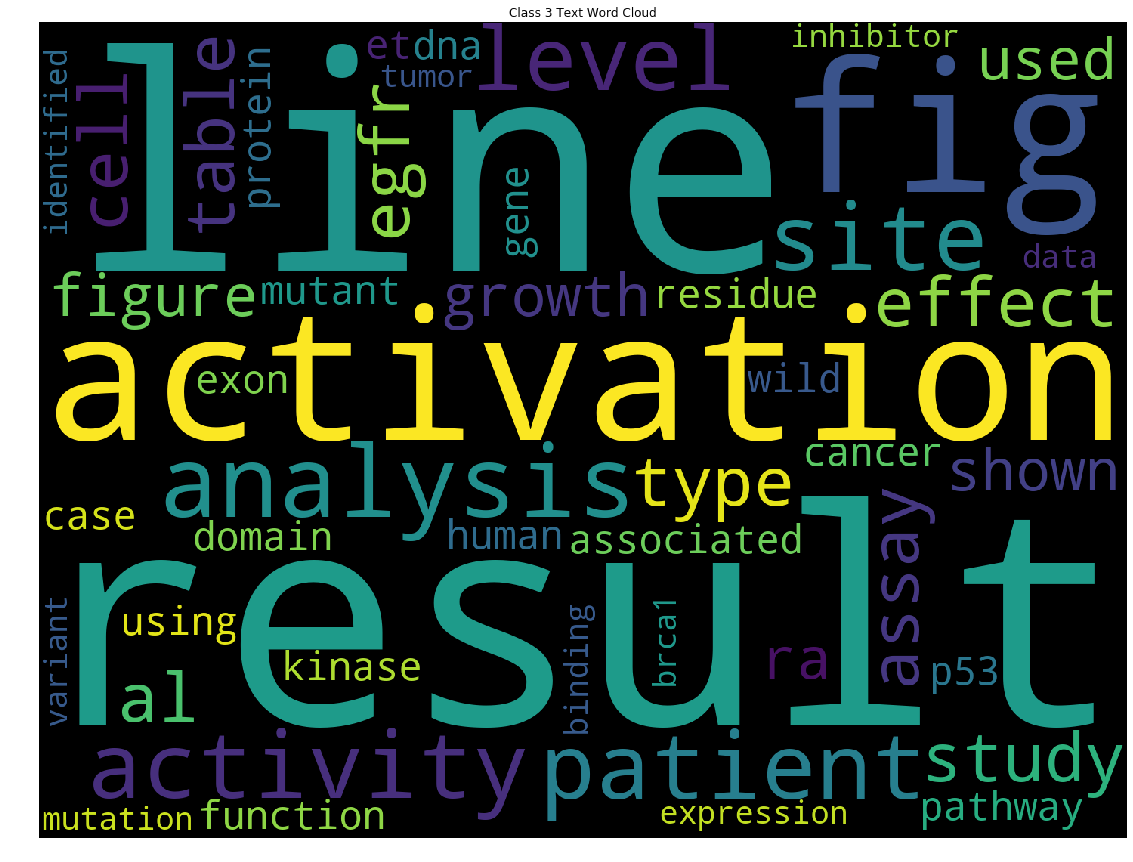

In [137]:
from wordcloud import WordCloud

cloud = WordCloud(width=1440, height=1080).generate(" ".join(top_50))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
ax = plt.axes()
ax.set_title('Top 50 wods Word Cloud')

#### 4.2.6 Feature 6-> Let us identify the Least used words(other than stopwords) in our input data for further feature generation.

In [35]:
##Similarly lets identify the least used words:
def get_least_n_words(corpus, n=None):
    
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
     
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

#Now I want to get the Least 50 common words:
least_50=[]
common_words = get_least_n_words(training_df["text"], 20)
for word, freq in common_words:
    least_50.append(word)


Text(0.5, 1.0, 'Least 50 wods Word Cloud')

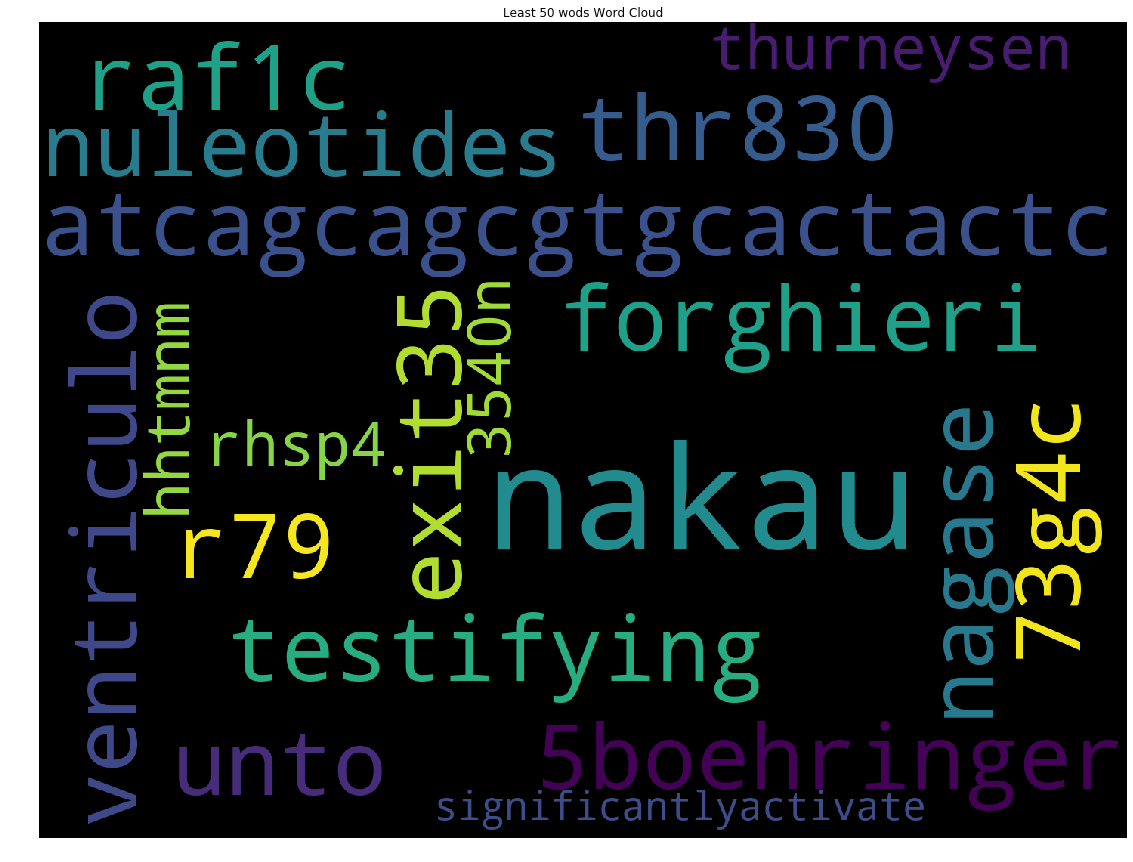

In [138]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(least_50))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
ax = plt.axes()
ax.set_title('Least 50 wods Word Cloud')

In [36]:
##Feature-6: The count of least used words.
training_df['least_50_words'] = training_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in least_50]) )
testing_df['least_50_words'] = testing_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in least_50]) )
cv_data_df['least_50_words'] = cv_data_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in least_50]) )

#### 4.2.6 Feature 7,8,9,10,11-> Part Of Speech Features

Now we will identify the Part Of Speech from the written text. We will create 5 features for Nouns, Pronouns, Verbs, Adverbs, Adjectives.

In [37]:
#https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'], #POS tags of nouns
    'pron' : ['PRP','PRP$','WP','WP$'], # POS tags of pronouns
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'], #POS tags of verbs
    'adj' :  ['JJ','JJR','JJS'], #POS tags of adjectives
    'adv' : ['RB','RBR','RBS','WRB'] ##POS tags of adverbs
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

training_df['noun_count'] = training_df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
training_df['verb_count'] = training_df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
training_df['adj_count'] = training_df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
training_df['adv_count'] = training_df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
training_df['pron_count'] = training_df['text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [38]:
testing_df['noun_count'] = testing_df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
testing_df['verb_count'] = testing_df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
testing_df['adj_count'] = testing_df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
testing_df['adv_count'] = testing_df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
testing_df['pron_count'] = testing_df['text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [39]:
cv_data_df['noun_count'] = cv_data_df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
cv_data_df['verb_count'] = cv_data_df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
cv_data_df['adj_count'] = cv_data_df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
cv_data_df['adv_count'] = cv_data_df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
cv_data_df['pron_count'] = cv_data_df['text'].apply(lambda x: check_pos_tag(x, 'pron'))

### Topic Models as features

Let's look at major patterns across classes in the text. Let's take a look at the most common words and gene variants in one of the classes.

In [41]:
train_df.head(2)

,ID,Gene,Variation,Class,TEXT
208,208,EGFR,V774A,2,purpose clinical features of epidermal growth ...
3281,3281,RET,C634W,2,germ line missense mutations in the ret rearra...


##### Very, very technical. Let's look at major patterns across classes in the text. Let's take a look at the most common words and gene variants in one of the classes.

Text(0.5, 1.0, 'Class 3 Text Word Cloud')

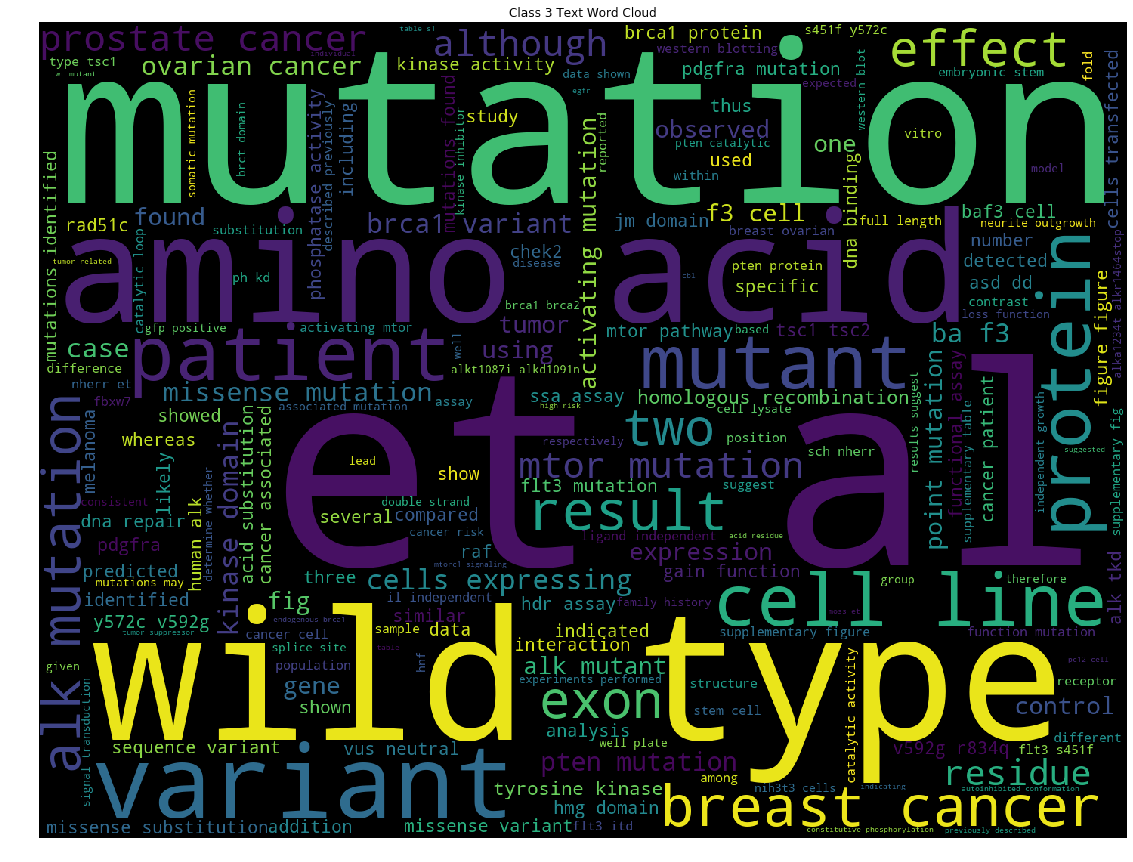

In [42]:
from wordcloud import WordCloud

cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_df[train_df.Class == 3]['TEXT']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
ax = plt.axes()
ax.set_title('Class 3 Text Word Cloud')

Text(0.5, 1.0, 'Class 3 Top Gene Variants')

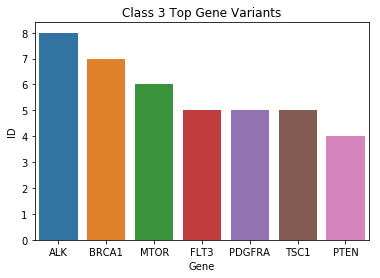

In [43]:
data = train_df[train_df['Class'] == 3].groupby('Gene')["ID"].count().reset_index()
sns.barplot(x="Gene", y="ID", data=data.sort_values('ID', ascending=False)[:7])
ax = plt.axes()
ax.set_title('Class 3 Top Gene Variants')

#### Insights & Topic Modeling

There are so many keywords that straight up tell us what the class is about. The most important insight of the word cloud, however, is the importance of bigrams in our text. "Amino Acid", "Homologous Recombination", "Breast Cancer" are only a few examples of many. My hypothesis is that we'll find terms like these extremely prevalent in technical literature such as our text.

TF-IDF considering bigrams could give us a pretty good score without any other optimizations, but let's take a look at some more sophisticated topic modeling with Latent Dirichlet Allocation to see if we can algorithmically find these topics without having to do this inspection for every class.

In [44]:
#The LDA topic model algorithm requires a document word matrix as the main input.
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50000,
                                )
tf = tf_vectorizer.fit_transform(training_df['text'])

In [45]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['20',
 'activation',
 'activity',
 'al',
 'assay',
 'associated',
 'binding',
 'brca1',
 'cancer',
 'case',
 'clinical',
 'control',
 'dna',
 'domain',
 'effect',
 'egfr',
 'et',
 'exon',
 'fig',
 'figure',
 'function',
 'functional',
 'growth',
 'human',
 'identified',
 'inhibitor',
 'kinase',
 'level',
 'line',
 'mouse',
 'mutant',
 'observed',
 'p53',
 'pathway',
 'patient',
 'ra',
 'receptor',
 'region',
 'residue',
 'response',
 'sample',
 'sequence',
 'signaling',
 'site',
 'table',
 'treatment',
 'tumor',
 'used',
 'variant',
 'wild']

#### Fitting Our LDA Model

In [46]:
#Build LDA model with sklearn
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=9, #Number of topics
                                max_iter=5, ## Max learning iterations
#Because we want to find out the best parametres, we use Latent Dirichlet Allocation with online variational Bayes algorithm:                                
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [47]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=9, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

#### Major Topics in Our Text!

We do get some fairly differentiated topics in our text data, where we can see class 3 still related to BRCA1 variants and breast cancer.

Some other classes are more concerned with exons & kinases while others are more focused on the p53 protein and phosphorylation pathways.

In [48]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [49]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
variant brca1 assay cancer functional domain activity fig function wild
Topic #1:
egfr patient response 20 exon treatment tumor kinase cancer line
Topic #2:
cancer fig sample line dna figure case tumor identified table
Topic #3:
al et figure domain mutant activity binding function human level
Topic #4:
p53 mutant dna binding domain activity wild cancer fig figure
Topic #5:
mutant kinase activity fig domain binding figure residue activation wild
Topic #6:
tumor cancer mouse pathway fig signaling figure growth human line
Topic #7:
ra activation mutant pathway figure fig cancer level al et
Topic #8:
patient exon clinical tumor case response table treatment kinase mutant



##### LDA model doesn’t give a topic name to those words and it is for us humans to interpret them.

##### This Method will Be used in Later Feature Engineering

#### Text contains reference of particular gene and variatio. To check this, we will create features for gene  and variation names used. For this we need gene  and variation corpus, but I did not find any readily available corpus.

## Advance Text Processing

### 4.3 Vectorizing TEXT

### 4.3.1 Method 1

In [53]:
#So I created a list 
#Lets join the list of Genes+Variation and see what happens

# Collecting all the genes and variations data into a single list
gene_variation = []
for gene in X_train['Gene'].values:
    gene_variation.append(gene)
for variation in X_train['Variation'].values:
    gene_variation.append(variation)

In [54]:
print("Total number of unique words in corpus :", len(gene_variation))

Total number of unique words in corpus : 5312


In [55]:
tfidfVectorizer = TfidfVectorizer()
text2 = tfidfVectorizer.fit(gene_variation)
gene_variation_features = tfidfVectorizer.get_feature_names()
train_text = tfidfVectorizer.transform(train_df['TEXT'])
test_text = tfidfVectorizer.transform(test_df['TEXT'])
cv_text = tfidfVectorizer.transform(cv_df['TEXT'])

In [57]:
train_text.shape

(2124, 2663)

### 4.3.2 Method 2

#### Feature Extraction

Now the text data is cleaned it is not quite ready for modelling. I first have to convert the text into a numerical form.

#### Tfidf Vectorizer

TF-IDF (term frequency–inverse document frequency) vectorises words by taking into account the frequency of a word in a given document and the frequency between documents.

Mathematically, the importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. To break it down:

#### hyper parameters can be tuned using n_grams to combine  tokens together 

In [132]:
# This function tells us log loss on cv data
def logistic_reg(X_train_tfidf,X_cv_tfidf):    
    # Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
     
    clf = SGDClassifier( loss='log', random_state=42)
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    predict_y = sig_clf.predict_proba( X_cv_tfidf)
    return log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
        

In [139]:
best= []
best_loglos=[]

### Tuning Hyperparameters of TFIDF Vectorizer

Hyper parameters help us tune a model from the default conditions. I investigated n-gram range, max features and max df to see which conditions would give me a higher accuracy score. 

### M2.1 ngram

we cannot rely on single tokens to hold as much information as double or triple combined. N-gram range will take a range of n tokens to use as features.

For example,
   1. (1,1) default: using only a singular token
   2. (1,2) bigram: using a range of singular and double tokens
   3. (1,3) trigram: using a range of singular, double and triple tokens

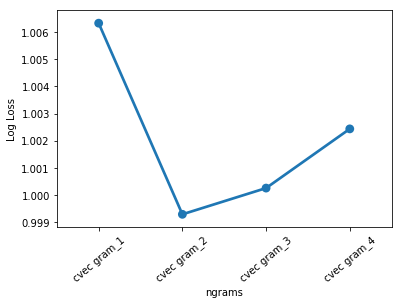

In [136]:
def tfidf_vec_ngram(params, X_train,X_cv, y_train,y_cv):
    tfidf_v = TfidfVectorizer(ngram_range=(params))
    
    tfidf_v.fit(X_train)
    X_train_tfidf = tfidf_v.transform(X_train)
    X_cv_tfidf = tfidf_v.transform(X_cv)

 
    return logistic_reg(X_train_tfidf,X_cv_tfidf)  



params = [(1,1), (1,2),(1,3), (1,4)] 
ngram_Log_loss = []
for p in params:
    ngram_Log_loss.append(tfidf_vec_ngram(p, training_df['text'],cv_data_df['text'] , y_train,y_cv))
    
ngrams = ['cvec gram_1','cvec gram_2','cvec gram_3','cvec gram_4']
ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_Log_loss}, index=[0,1,2,3])

#best_params.append(ngram_df['params'].where(ngram_df['scores'].min()))
#best_logloss.append(ngram_df['scores'].min())

# plot scores on graph
sns.pointplot(x='params', y='scores', data =ngram_df)
plt.ylabel('Log Loss')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()


In [140]:
ngram_df

,params,scores
0,cvec gram_1,1.006334
1,cvec gram_2,0.999286
2,cvec gram_3,1.000253
3,cvec gram_4,1.002436


In [141]:
min =ngram_df['scores'].min()

best.append(ngram_df.loc[ngram_df['scores']== min, 'params'].iloc[0])
best_loglos.append(ngram_df['scores'].min())

In [142]:
best

['cvec gram_2']

##### As shown above, it was concluded that the accuracy increases with the range because as it increases it gives more information for the model to predict. Here (1,3) range has the highest score.

### M2.2 Max Features

Count vectoriser transforms each token into a predictive feature and with text data this feature size could be in the thousands or even millions. Max Features is a parameter that will limit how many of these you can use as predictors. Using in conjunction with ngrams it will also tell us which ones are the most significant with frequency.

I investigated a range of max features. Including all the features (default param) the accuracy was at the highest value. This is because as you increase the max features the more words you give the model to train on thus increasing the accuracy.

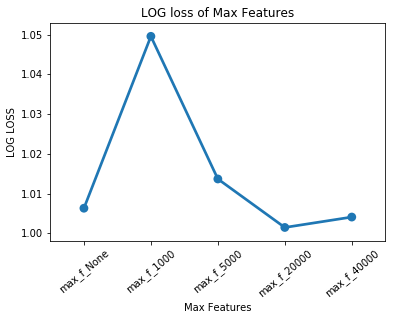

In [143]:
def tfidf_vec_max_features(params, X_train,X_cv, y_train,y_cv):
    tfidf_v = TfidfVectorizer(max_features=params)
    
    tfidf_v.fit(X_train)
    X_train_tfidf = tfidf_v.transform(X_train)
    X_cv_tfidf = tfidf_v.transform(X_cv)
    return logistic_reg(X_train_tfidf,X_cv_tfidf) 


mf_params = [None, 1000, 5000, 20000,40000]
min_features_logloss = [tfidf_vec_max_features(p, training_df['text'],cv_data_df['text'], y_train,y_cv) for p in mf_params]
max_features = ['max_f_'+str(p) for p in mf_params]
# dataframe for scores
max_features_df = pd.DataFrame({'params':max_features, 'scores':min_features_logloss}, index=[0,1,2,3,4])

sns.pointplot(x='params', y='scores', data =max_features_df)
plt.ylabel('LOG LOSS')
plt.xlabel('Max Features')
plt.xticks(rotation=40)
plt.title('LOG loss of Max Features')
plt.show()

In [145]:
max_features_df

,params,scores
0,max_f_None,1.006334
1,max_f_1000,1.049559
2,max_f_5000,1.013692
3,max_f_20000,1.001494
4,max_f_40000,1.004112


In [146]:
min =max_features_df['scores'].min()


best.append(max_features_df.loc[max_features_df['scores']== min, 'params'].iloc[0])

best_loglos.append(max_features_df['scores'].min())

### M2.3 Max df

This is the threshold of the Maximum Document frequency of a token. This can help limit the words that may appear too frequently in a corpus. Another way of looking at it is corpus-specific stop words.

###### ignore terms that appear in more than 50% of the documents
max_df = 0.50

###### ignore terms that appear in more than 25 documents
max_df = 25

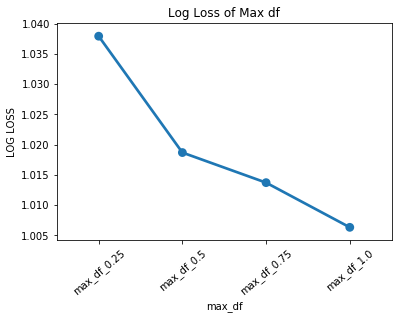

In [147]:
def tfidf_vec_max_df(params, X_train,X_cv, y_train,y_cv):
    tfidf_v = TfidfVectorizer(max_df=params)
    
    tfidf_v.fit(X_train)
    X_train_tfidf = tfidf_v.transform(X_train)
    X_cv_tfidf = tfidf_v.transform(X_cv)
    return logistic_reg(X_train_tfidf,X_cv_tfidf) 

mdf_params = [0.25, 0.5, 0.75, 1.0]
max_df_logloss = [tfidf_vec_max_df(p,training_df['text'],cv_data_df['text'], y_train,y_cv) for p in mdf_params]
max_df = ['max_df_'+str(p) for p in mdf_params]
# dataframe for scores
max_df_df = pd.DataFrame({'params':max_df, 'scores':max_df_logloss}, index=[0,1,2,3])

sns.pointplot(x='params', y='scores', data =max_df_df)
plt.ylabel('LOG LOSS')
plt.xlabel('max_df')
plt.xticks(rotation=40)
plt.title('Log Loss of Max df')
plt.show()


In [148]:
min =max_df_df['scores'].min()

best.append(max_df_df.loc[max_df_df['scores']== min, 'params'].iloc[0])

best_loglos.append(max_df_df['scores'].min())

### M2.4 Min df

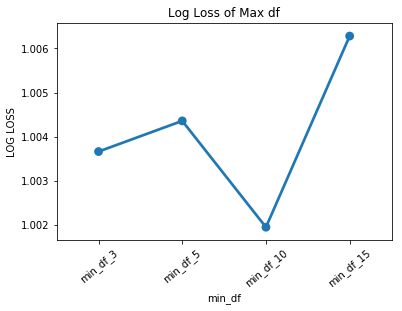

In [149]:
def tfidf_vec_min_df(params, X_train,X_cv, y_train,y_cv):
    tfidf_v = TfidfVectorizer(min_df=params)
    
    tfidf_v.fit(X_train)
    X_train_tfidf = tfidf_v.transform(X_train)
    X_cv_tfidf = tfidf_v.transform(X_cv)
    return logistic_reg(X_train_tfidf,X_cv_tfidf) 

mdf_params = [3, 5, 10, 15]
min_df_logloss = [tfidf_vec_min_df(p,training_df['text'],cv_data_df['text'], y_train,y_cv) for p in mdf_params]
min_df = ['min_df_'+str(p) for p in mdf_params]
# dataframe for scores
min_df_df = pd.DataFrame({'params':min_df, 'scores':min_df_logloss}, index=[0,1,2,3])

sns.pointplot(x='params', y='scores', data =min_df_df)
plt.ylabel('LOG LOSS')
plt.xlabel('min_df')
plt.xticks(rotation=40)
plt.title('Log Loss of Max df')
plt.show()

In [151]:
min =min_df_df['scores'].min()

best.append(min_df_df.loc[min_df_df['scores']== min, 'params'].iloc[0])

best_loglos.append(min_df_df['scores'].min())

### M2.5 Comparing BEST Parameters

In [152]:
best

['cvec gram_2', 'max_f_20000', 'max_df_1.0', 'min_df_10', 'min_df_10']

In [155]:
best_loglos.

[0.9992858873768562,
 1.001494389369546,
 1.0063340602514748,
 1.0019527106284554,
 1.0019527106284554]

In [156]:
# dataframe for Best params
max_df = pd.DataFrame({'params':best, 'scores':best_loglos}, index=[0,1,2,3,4])



In [157]:
max_df

,params,scores
0,cvec gram_2,0.999286
1,max_f_20000,1.001494
2,max_df_1.0,1.006334
3,min_df_10,1.001953
4,min_df_10,1.001953


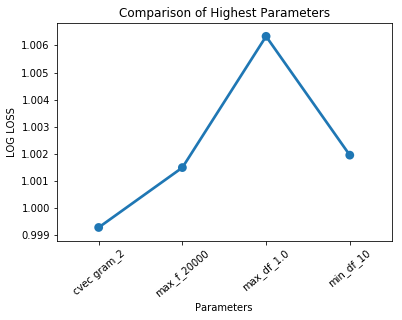

In [158]:
sns.pointplot(x='params', y='scores', data =max_df)
plt.ylabel('LOG LOSS')
plt.xlabel('Parameters')
plt.xticks(rotation=40)
plt.title('Comparison of Highest Parameters')
plt.show()

I compared the accuracy of the highest parameters the results are below:

ngram_range = (1,2): Bigram had the lowest log loss

max_features:20000

max_df:1.0

min_df:10

#### M2.6 Combining Parameters

#### Train Data

Let us apply TFIDF vectorization on our Text data and instead of selecting all the words let's select top 10000 words based on tf-idf values

In [159]:
tv = TfidfVectorizer(ngram_range=(1,2),min_df=10,max_df=1.0,max_features=20000)
train_feat_sparse = tv.fit_transform(training_df['text'])

cv_feat_sparse = tv.transform(cv_data_df['text'])
vocab = tv.get_feature_names()
feature_array = np.array(vocab)

print("Total number of unique words in train data :", len(vocab))
print('Combined params best log,loss{}'.format(logistic_reg(train_feat_sparse,cv_feat_sparse)))

Total number of unique words in train data : 20000
Combined params best log,loss0.9920874094446392


##### The combined parameters actually gave a better  log-loss than Parameter alone alone.

In [160]:
print("train Shape -> ",train_feat_sparse.shape," Type",type(train_feat_sparse))

train Shape ->  (2124, 20000)  Type <class 'scipy.sparse.csr.csr_matrix'>


##### selecting all the words let's select top 10000 words based on tf-idf values

In [161]:
#https://stackoverflow.com/questions/56707363/how-to-get-top-n-terms-with-highest-tf-idf-score-big-sparse-matrix?noredirect=1&lq=1&lq=1


# Replace this with the number of top words you want to get in each row
top_n_words = 10000

#Sorting  in descending order and selecting top 1000 features names

feature_imp_dict = sorted(list(zip(tv.get_feature_names(),train_feat_sparse.sum(0).getA1())),key=lambda x: x[1], reverse=True)[:top_n_words]

In [162]:
#Get top n key's with Value as dictionary
#return  keys as a list in Python
important_feature=[]
for key,v in feature_imp_dict:
     important_feature.append(key)

In [163]:

feature_index = []
false_positives_count = 0

for a in important_feature:
    
    f= vocab.index(a)
    feature_index.append(f)   

In [164]:
train_feat_sparse = train_feat_sparse.tocsc()[:,feature_index]

In [165]:
print("train Shape -> ",train_feat_sparse.shape," Type",type(train_feat_sparse))

train Shape ->  (2124, 10000)  Type <class 'scipy.sparse.csc.csc_matrix'>


#### TEST

In [166]:
# we use the same vectorizer that was trained on train data
test_feat_sparse = tv.transform(testing_df['text'])

print("test Shape before-> ",test_feat_sparse.shape," Type",type(test_feat_sparse))



test Shape before->  (665, 20000)  Type <class 'scipy.sparse.csr.csr_matrix'>


In [167]:
test_feat_sparse = test_feat_sparse.tocsc()[:,feature_index]

print("test Shape After-> ",test_feat_sparse.shape," Type",type(test_feat_sparse))

test Shape After->  (665, 10000)  Type <class 'scipy.sparse.csc.csc_matrix'>


#### CV data

In [168]:
cv_feat_sparse = cv_feat_sparse .tocsc()[:,feature_index]

print("cv Shape After-> ",cv_feat_sparse.shape," Type",type(cv_feat_sparse))

cv Shape After->  (532, 10000)  Type <class 'scipy.sparse.csc.csc_matrix'>


#### normalize

In [169]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_feat_sparse, axis=0)

# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_feat_sparse, axis=0)

# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_feat_sparse, axis=0)


In [170]:
#don't forget to normalize every feature
train_text_onehotCoding = normalize(train_text, axis=0)

test_text_onehotCoding = normalize(test_text, axis=0)

cv_text_onehotCoding = normalize(cv_text, axis=0)

In [171]:
'word_count'
word_count_standardized_train_data = normalize(training_df['word_count'].values.reshape(-1,1))
word_count_standardized_test_data = normalize(testing_df['word_count'].values.reshape(-1,1))
word_count_standardized_cv_data = normalize(cv_data_df['word_count'].values.reshape(-1,1))

'char_count'
char_count_standardized_train_data = normalize(training_df['char_count'].values.reshape(-1,1))
char_count_standardized_test_data = normalize(testing_df['char_count'].values.reshape(-1,1))
char_count_standardized_cv_data = normalize(cv_data_df['char_count'].values.reshape(-1,1))


'Diversity_score'

Word_Density_standardized_train_data = normalize(training_df['Diversity_score'].values.reshape(-1,1))
Word_Density_standardized_test_data = normalize(testing_df['Diversity_score'].values.reshape(-1,1))
Word_Density_standardized_cv_data = normalize(cv_data_df['Diversity_score'].values.reshape(-1,1))

'stopword_count'

stopword_count_standardized_train_data = normalize(training_df['stopword_count'].values.reshape(-1,1))
stopword_count_standardized_test_data = normalize(testing_df['stopword_count'].values.reshape(-1,1))
stopword_count_standardized_cv_data = normalize(cv_data_df['stopword_count'].values.reshape(-1,1))

'Top_50_words'

topword_count_standardized_train_data = normalize(training_df['Top_50_words'].values.reshape(-1,1))
topword_count_standardized_test_data = normalize(testing_df['Top_50_words'].values.reshape(-1,1))
topword_count_standardized_cv_data = normalize(cv_data_df['Top_50_words'].values.reshape(-1,1))

'least_50_words'

leastword_count_standardized_train_data = normalize(training_df['least_50_words'].values.reshape(-1,1))
leastword_count_standardized_test_data = normalize(testing_df['least_50_words'].values.reshape(-1,1))
leastword_count_standardized_cv_data = normalize(cv_data_df['least_50_words'].values.reshape(-1,1))

'noun_count'
nounword_count_standardized_train_data = normalize(training_df['noun_count'].values.reshape(-1,1))
nounword_count_standardized_test_data = normalize(testing_df['noun_count'].values.reshape(-1,1))
nounword_count_standardized_cv_data = normalize(cv_data_df['noun_count'].values.reshape(-1,1))

'verb_count'
verb_count_standardized_train_data = normalize(training_df['verb_count'].values.reshape(-1,1))
verb_count_standardized_test_data = normalize(testing_df['verb_count'].values.reshape(-1,1))
verb_count_standardized_cv_data = normalize(cv_data_df['verb_count'].values.reshape(-1,1))

'adj_count'
adj_count_standardized_train_data = normalize(training_df['adj_count'].values.reshape(-1,1))
adj_count_standardized_test_data = normalize(testing_df['adj_count'].values.reshape(-1,1))
adf_count_standardized_cv_data = normalize(cv_data_df['adj_count'].values.reshape(-1,1))

'adv_count'
adv_count_standardized_train_data = normalize(training_df['adv_count'].values.reshape(-1,1))
adv_count_standardized_test_data = normalize(testing_df['adv_count'].values.reshape(-1,1))
adv_count_standardized_cv_data = normalize(cv_data_df['adv_count'].values.reshape(-1,1))

'pron_count'
pro_count_standardized_train_data = normalize(training_df['pron_count'].values.reshape(-1,1))
pro_count_standardized_test_data = normalize(testing_df['pron_count'].values.reshape(-1,1))
pro_count_standardized_cv_data = normalize(cv_data_df['pron_count'].values.reshape(-1,1))


### Stack above three features

In [172]:
train_x_onehotCoding = hstack((word_count_standardized_train_data,char_count_standardized_train_data,Word_Density_standardized_train_data,
stopword_count_standardized_train_data,topword_count_standardized_train_data,leastword_count_standardized_train_data,
 train_gene_feature_onehotCoding,train_variation_feature_onehotCoding,train_text_onehotCoding,train_text_feature_onehotCoding,
nounword_count_standardized_train_data, verb_count_standardized_train_data,  adj_count_standardized_train_data,
 adv_count_standardized_train_data,pro_count_standardized_train_data                               
 )).tocsr()
train_y = np.array(list(train_df['Class']))

In [173]:
test_x_onehotCoding = hstack((word_count_standardized_test_data,
char_count_standardized_test_data,
Word_Density_standardized_test_data,
stopword_count_standardized_test_data, 
topword_count_standardized_test_data,
leastword_count_standardized_test_data,
test_gene_feature_onehotCoding, test_variation_feature_onehotCoding, test_text_onehotCoding,test_text_feature_onehotCoding,
nounword_count_standardized_test_data, verb_count_standardized_test_data,  adj_count_standardized_test_data,
 adv_count_standardized_test_data, pro_count_standardized_test_data                               )).tocsr()
test_y = np.array(list(test_df['Class']))

In [174]:
cv_x_onehotCoding = hstack((word_count_standardized_cv_data,
char_count_standardized_cv_data,
Word_Density_standardized_cv_data,
stopword_count_standardized_cv_data,
topword_count_standardized_cv_data,
leastword_count_standardized_cv_data,
cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding, cv_text_onehotCoding,cv_text_feature_onehotCoding,
nounword_count_standardized_cv_data, verb_count_standardized_cv_data,  adf_count_standardized_cv_data,
 adv_count_standardized_cv_data, pro_count_standardized_cv_data                             )).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [175]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 14866)
(number of data points * number of features) in test data =  (665, 14866)
(number of data points * number of features) in cross validation data = (532, 14866)


<h1>5. Machine Learning Models</h1>

In [176]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [177]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

### 5.1 Logistic Regression with Class Balancing

#### 5.1.1 Hyper Parameter Tuning

for alpha = 1e-06
Log Loss : 0.9608723517194109
for alpha = 1e-05
Log Loss : 0.9565414216150717
for alpha = 0.0001
Log Loss : 0.9246063651221235
for alpha = 0.001
Log Loss : 0.9064869845264947
for alpha = 0.01
Log Loss : 0.9584493918313971
for alpha = 0.1
Log Loss : 1.0589178172798142
for alpha = 1
Log Loss : 1.2907238437404156
for alpha = 10
Log Loss : 1.5739327997167203
for alpha = 100
Log Loss : 1.6214887017157094


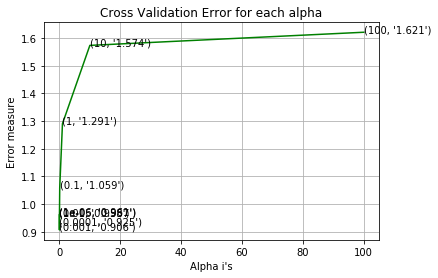

For values of best alpha =  0.001 The train log loss is: 0.5407237312243303
For values of best alpha =  0.001 The cross validation log loss is: 0.9064869845264947
For values of best alpha =  0.001 The test log loss is: 0.9978032031810316


In [178]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification


alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### 5.1.2  Testing the model with best hyper paramters

Log loss : 0.9064869845264947
Number of mis-classified points : 0.30451127819548873
-------------------- Confusion matrix --------------------


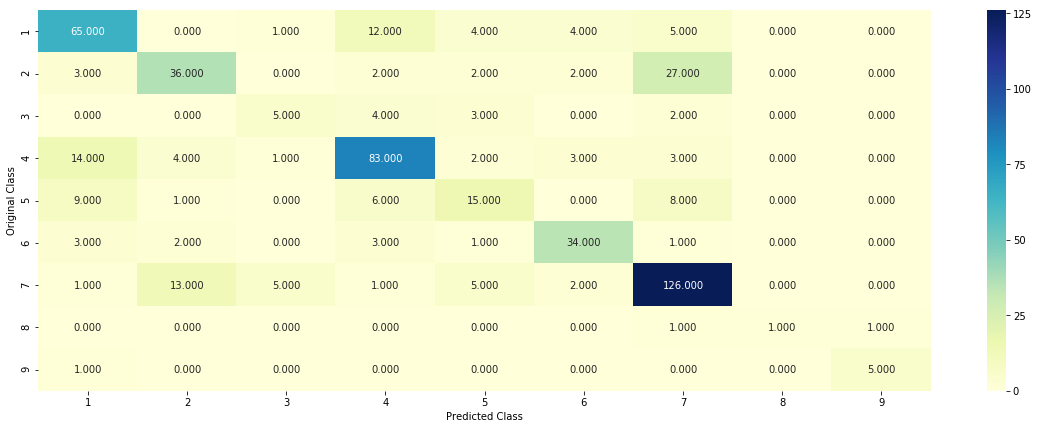

-------------------- Precision matrix (Columm Sum=1) --------------------


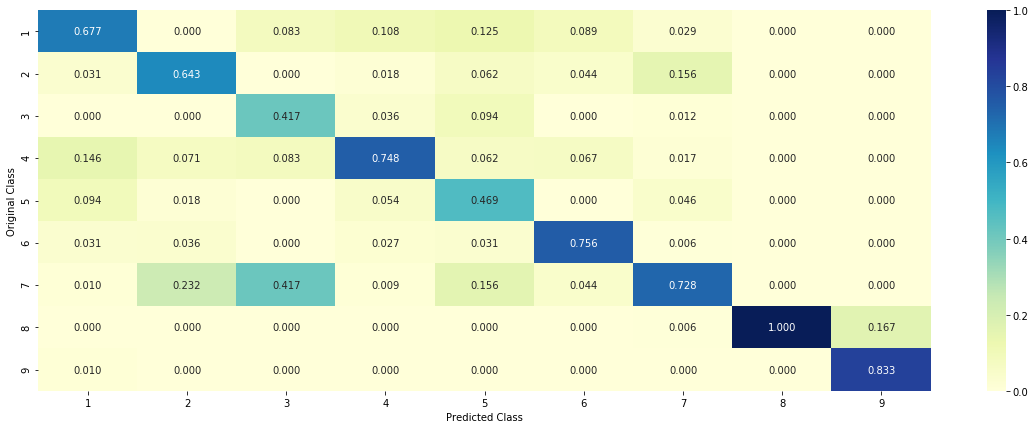

-------------------- Recall matrix (Row sum=1) --------------------


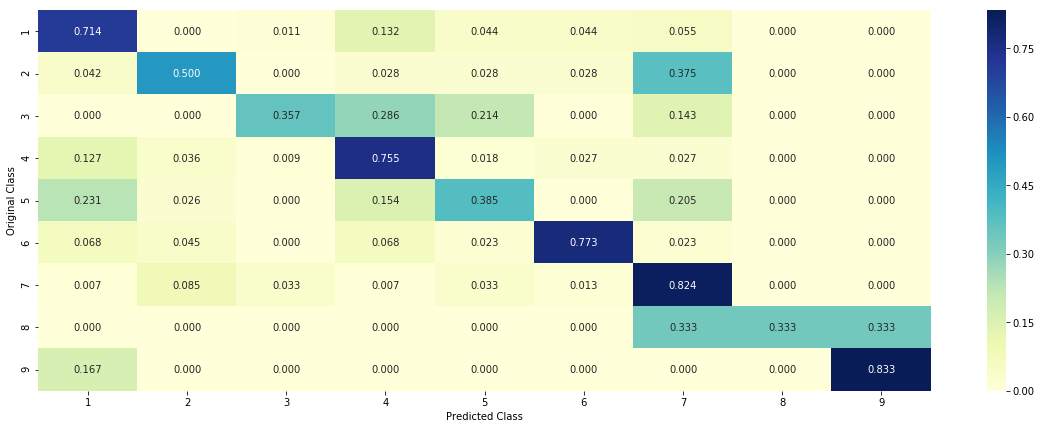

In [179]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

### Applying this Feature Engineering it gave us better results , since we were able to minimise the log-loss<1.

### Summarising using a PRETTY TABLE


In [180]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = "*** Model Summary *** [Performance Metric: Log-Loss]"
ptable.field_names=["Model Name","Train","CV","Test","% Misclassified Points"]
ptable.add_row(["Naive Bayes","0.87","1.25","1.25","35"])
ptable.add_row(["KNN","0.51","1.06","1.07","38"])
ptable.add_row(["Logistic Regression With Class balancing","0.54","1.03","1.05","34"])
ptable.add_row(["Logistic Regression Without Class balancing","0.50","1.08","1.08","36"])
ptable.add_row(["Linear SVM","0.55","1.10","1.10","36"])
ptable.add_row(["Random Forest Classifier With One hot Encoding","0.64","1.14","1.14","39"])
ptable.add_row(["Random Forest Classifier With Response Coding","0.05","1.35","1.25","49"])
ptable.add_row(["Stack Models:LR+NB+SVM","0.60","1.12","1.08","35"])
ptable.add_row(["Maximum Voting classifier","0.82","1.13","1.13","36"])

ptable.add_row(["LR with Class Balancing (TFIDF TOP 1000)","0.42","0.99","0.96","36"])
ptable.add_row(["LR with Class Balancing (BOW UNIgram and BIgram)","0.70","1.19","1.15","39"])

ptable.add_row(["LR with Class Balancing (Feature Engineering-1)","0.54","0.90","0.99","30"])

print(ptable)
print()

+--------------------------------------------------+-------+------+------+------------------------+
|                    Model Name                    | Train |  CV  | Test | % Misclassified Points |
+--------------------------------------------------+-------+------+------+------------------------+
|                   Naive Bayes                    |  0.87 | 1.25 | 1.25 |           35           |
|                       KNN                        |  0.51 | 1.06 | 1.07 |           38           |
|     Logistic Regression With Class balancing     |  0.54 | 1.03 | 1.05 |           34           |
|   Logistic Regression Without Class balancing    |  0.50 | 1.08 | 1.08 |           36           |
|                    Linear SVM                    |  0.55 | 1.10 | 1.10 |           36           |
|  Random Forest Classifier With One hot Encoding  |  0.64 | 1.14 | 1.14 |           39           |
|  Random Forest Classifier With Response Coding   |  0.05 | 1.35 | 1.25 |           49           |


As we have seen in last two notebook we have worked with different featurization in order to improve our model performance. Now in this we will try some of the feature engineering techniques to reduce the log-loss to a value less than 1.0.

And after trying some feature engineering we got our test log loss less than 1. In this we are only working with Logistic reg because as we know our data is high dim and we know with high dim data logistic reg works well and here we got the performance.